#                                            Automobile Midterm

In this midterm I hope to predict whether a car has two doors or four doors using some classifying algorithms we talked about in class. This first one I look at is Logistic Regression, just because being a stats major I am familiar with how that one actually works(somewhat). Second I decided to look into Support Vector Machines(SVM). Fianlly I used the Gaussian Naive Bayes algorithm to classify and hopefully predict.

In [751]:
import warnings
warnings.filterwarnings('ignore')

#                                                Data Exploration and Cleaning

In [752]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
auto = pd.read_csv('Automobile_data.csv')
del auto['normalized-losses']
del auto['bore']
del auto['stroke']
del auto['peak-rpm']
auto.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,2548,dohc,four,130,mpfi,9.0,111,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,2548,dohc,four,130,mpfi,9.0,111,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2823,ohcv,six,152,mpfi,9.0,154,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,2337,ohc,four,109,mpfi,10.0,102,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,2824,ohc,five,136,mpfi,8.0,115,18,22,17450


In [753]:
auto['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [754]:
auto = auto[auto.price != '?']
auto = auto[auto.horsepower != '?']
auto = auto[auto['num-of-doors'] != '?']
def int_price(row):
    if type(row['price']) == str:
        return int(row['price'])
    
auto['int_price'] = auto.apply (lambda row: int_price (row),axis=1)
auto.dtypes
del auto['price']

In [755]:
pd.crosstab(auto['make'], auto['fuel-type'])

fuel-type,diesel,gas
make,,
alfa-romero,0,3
audi,0,6
bmw,0,8
chevrolet,0,3
dodge,0,8
honda,0,13
isuzu,0,2
jaguar,0,3
mazda,1,15


In [756]:
auto.groupby(['make']).mean().head()
#auto.groupby(['make','num-of-doors']).mean().head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,int_price
make,,,,,,,,,,,
alfa-romero,2.333333,90.566667,169.600000,64.566667,50.000000,2639.666667,137.333333,9.000000,20.333333,26.666667,15498.333333
audi,1.500000,102.733333,184.766667,68.850000,54.833333,2758.666667,130.666667,8.633333,19.333333,24.500000,17859.166667
bmw,0.375000,103.162500,184.500000,66.475000,54.825000,2929.375000,166.875000,8.575000,19.375000,25.375000,26118.750000
chevrolet,1.000000,92.466667,151.933333,62.500000,52.400000,1757.000000,80.333333,9.566667,41.000000,46.333333,6007.000000
dodge,1.000000,95.175000,161.450000,64.212500,51.775000,2146.375000,103.250000,8.763750,28.500000,34.625000,7790.125000


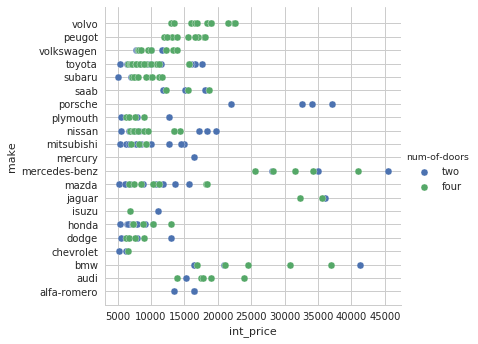

In [757]:
import seaborn as sns
sns.pairplot(x_vars = ["int_price"], y_vars = ["make"], data=auto, hue="num-of-doors", size=5)

In [758]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
new_auto = MultiColumnLabelEncoder(columns = ['symboling','make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','engine-size','fuel-system','compression-ratio','num-of-doors']).fit_transform(auto)
new_auto.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,city-mpg,highway-mpg,int_price
0,5,0,1,0,1,0,2,0,88.6,168.8,...,2548,0,2,18,5,13,111,21,27,13495
1,5,0,1,0,1,0,2,0,88.6,168.8,...,2548,0,2,18,5,13,111,21,27,16500
2,3,0,1,0,1,2,2,0,94.5,171.2,...,2823,4,3,27,5,13,154,19,26,16500
3,4,1,1,0,0,3,1,0,99.8,176.6,...,2337,2,2,11,5,22,102,24,30,13950
4,4,1,1,0,0,3,0,0,99.4,176.6,...,2824,2,1,21,5,5,115,18,22,17450


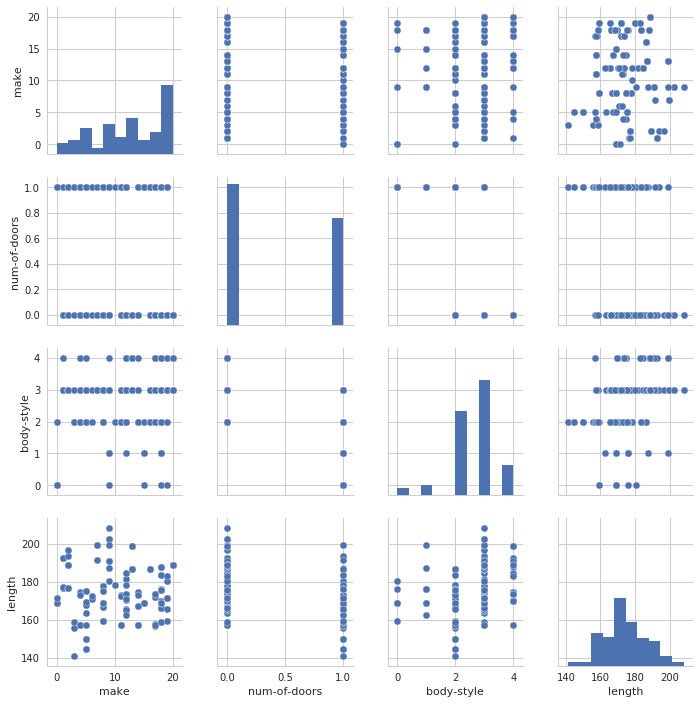

In [759]:
sns.pairplot(new_auto[['make','num-of-doors','body-style','length']])

In [760]:
new_auto.groupby('num-of-doors').count()

,symboling,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,...,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,city-mpg,highway-mpg,int_price
num-of-doors,,,,,,,,,,,,,,,,,,,,,
0,112,112,112,112,112,112,112,112,112,112,...,112,112,112,112,112,112,112,112,112,112
1,85,85,85,85,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,85


Text(0,0.5,'Frequency of Door #')

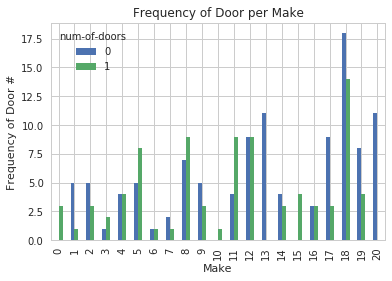

In [761]:
%matplotlib inline
pd.crosstab(new_auto['make'],new_auto['num-of-doors']).plot(kind='bar')
plt.title('Frequency of Door per Make')
plt.xlabel('Make')
plt.ylabel('Frequency of Door #')

Text(0,0.5,'Proportion of # of Doors')

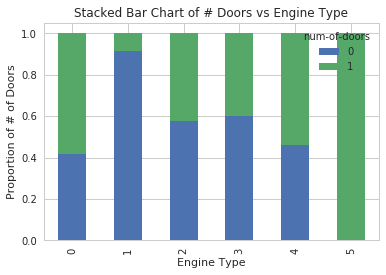

In [762]:
table=pd.crosstab(new_auto['engine-type'],new_auto['num-of-doors'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of # Doors vs Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Proportion of # of Doors')

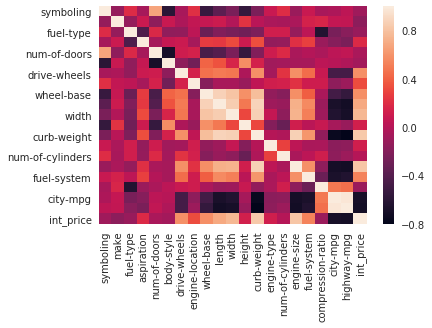

In [763]:
import seaborn as sb
sb.heatmap(new_auto.corr()) 

In [764]:
new_auto['two-door'] = [1 if x == 1 else 0 for x in new_auto['num-of-doors']]
new_auto['four-door'] = [1 if x == 0 else 0 for x in new_auto['num-of-doors']]

In [765]:
lst = []
for i in new_auto['width']:
    lst.append(int(round(i)))
#    print(lst)
#    print(i)

series1 = pd.Series(lst)
new_auto['width1'] = series1.values



lst2 = []
for i in new_auto['length']:
    lst2.append(int(round(i)))
#    print(lst)
#    print(i)

series2 = pd.Series(lst2)
new_auto['length1'] = series2.values


lst3 = []
for i in new_auto['wheel-base']:
    lst3.append(int(round(i)))
#    print(lst)
#    print(i)

series3 = pd.Series(lst3)
new_auto['wheel-base1'] = series3.values


lst4 = []
for i in new_auto['height']:
    lst4.append(int(round(i)))
#    print(lst)
#    print(i)

series4 = pd.Series(lst4)
new_auto['height1'] = series4.values


lst5 = []
for i in new_auto['horsepower']:
    lst5.append(int(i))
#    print(lst)
#    print(i)

series5 = pd.Series(lst5)
new_auto['horsepower1'] = series5.values

new_auto.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,int_price,two-door,four-door,width1,length1,wheel-base1,height1,horsepower1
0,5,0,1,0,1,0,2,0,88.6,168.8,...,21,27,13495,1,0,64,169,89,49,111
1,5,0,1,0,1,0,2,0,88.6,168.8,...,21,27,16500,1,0,64,169,89,49,111
2,3,0,1,0,1,2,2,0,94.5,171.2,...,19,26,16500,1,0,66,171,94,52,154
3,4,1,1,0,0,3,1,0,99.8,176.6,...,24,30,13950,0,1,66,177,100,54,102
4,4,1,1,0,0,3,0,0,99.4,176.6,...,18,22,17450,0,1,66,177,99,54,115


In [766]:
mid3 = new_auto['four-door']
new_auto.drop(labels=['four-door'], axis=1,inplace = True)
new_auto.insert(28, 'four-door', mid3)
#new_auto.head()

In [767]:
mid2 = new_auto['two-door']
new_auto.drop(labels=['two-door'], axis=1,inplace = True)
new_auto.insert(27, 'two-door', mid2)
#new_auto.head()

In [768]:
mid = new_auto['num-of-doors']
new_auto.drop(labels=['num-of-doors'], axis=1,inplace = True)
new_auto.insert(26, 'num-of-doors', mid)

In [769]:
door = []
for i in new_auto['two-door']:
    if i == 1:
        door.append(0)
    else:
        door.append(1)
        
series6 = pd.Series(door)
new_auto['door'] = series6.values

del new_auto['two-door']
del new_auto['four-door']
new_auto.head()

,symboling,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,int_price,width1,length1,wheel-base1,height1,horsepower1,num-of-doors,door
0,5,0,1,0,0,2,0,88.6,168.8,64.1,...,21,27,13495,64,169,89,49,111,1,0
1,5,0,1,0,0,2,0,88.6,168.8,64.1,...,21,27,16500,64,169,89,49,111,1,0
2,3,0,1,0,2,2,0,94.5,171.2,65.5,...,19,26,16500,66,171,94,52,154,1,0
3,4,1,1,0,3,1,0,99.8,176.6,66.2,...,24,30,13950,66,177,100,54,102,0,1
4,4,1,1,0,3,0,0,99.4,176.6,66.4,...,18,22,17450,66,177,99,54,115,0,1


# Logistic Regression

In [770]:
X = new_auto.iloc[:, 0:25]
y = new_auto.iloc[:, 27:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [771]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [772]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = LogReg.predict(X_test)
confusion_matrix1 = confusion_matrix(y_test, y_pred)
confusion_matrix1

array([[15,  1],
       [ 1, 23]])

In [773]:
ac_score1 = accuracy_score(y_test, y_pred)
print(ac_score1)

0.95


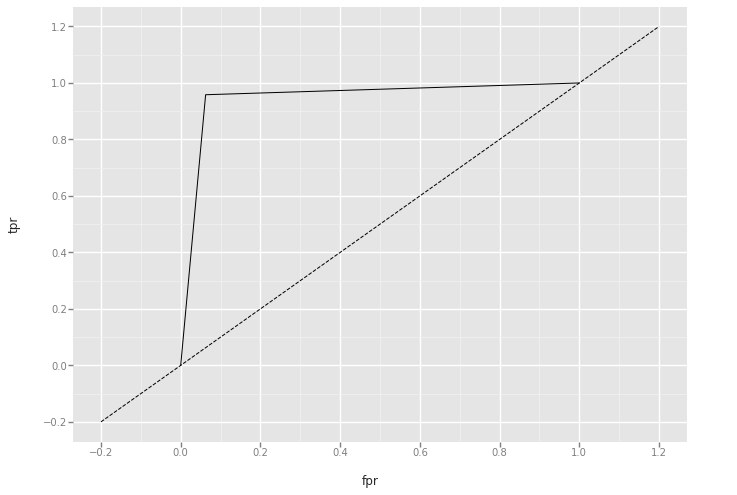

<ggplot: (-9223363256831868833)>

In [774]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from ggplot import *

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
roc_plot1 = ggplot(df, aes(x='fpr', y='tpr')) + geom_line() + geom_abline(linetype='dashed')
roc_plot1

In [775]:
class_rep1 = classification_report(y_test, y_pred)
print(class_rep1)

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        16
          1       0.96      0.96      0.96        24

avg / total       0.95      0.95      0.95        40



In [776]:
LogReg.score(X_test,y_test)

0.95

In [777]:
score1 = roc_auc_score(y_test,y_pred)
score1

0.9479166666666667

# SVM

In [778]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [779]:
classifier = SVC()
classifier.fit(X_train,y_train)
y_pred2 = classifier.predict(X_test)
classifier.score(X_test,y_test)

0.6

In [780]:
class_rep2 = classification_report(y_test, y_pred2)
print(class_rep2)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        16
          1       0.60      1.00      0.75        24

avg / total       0.36      0.60      0.45        40



In [781]:
score2 = roc_auc_score(y_test,y_pred2)
score2

0.5

In [782]:
ac_score2 = accuracy_score(y_test, y_pred2)
ac_score2

0.6

In [783]:
#print(type(y_pred))
#print(type(y_test))
#confusion_matrix2 = confusion_matrix(y_test,y_pred2)
#confusion_matrix2

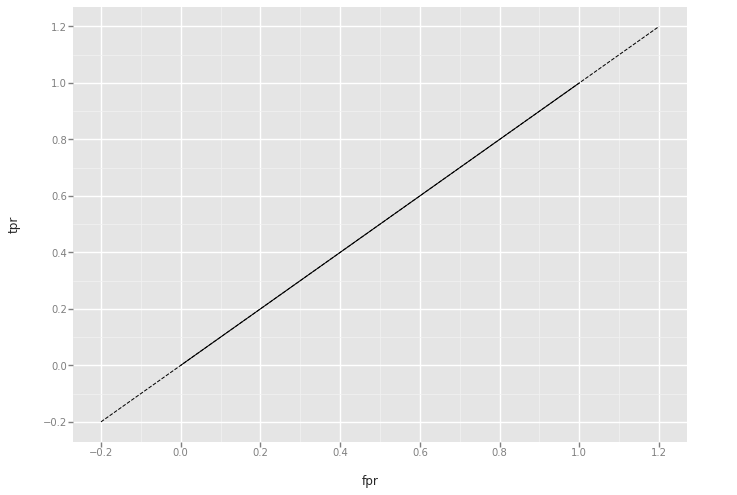

<ggplot: (-9223363256831868812)>

In [784]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred2)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
roc_plot2 = ggplot(df, aes(x='fpr', y='tpr')) + geom_line() + geom_abline(linetype='dashed')
roc_plot2

# Gaussian Naive Bayes

In [785]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred3 = gnb.fit(X_train,y_train).predict(X_test)

In [786]:
ac_score3 = accuracy_score(y_test, y_pred3)
ac_score3

0.875

In [787]:
class_rep3 = classification_report(y_test, y_pred3)
print(class_rep3)

             precision    recall  f1-score   support

          0       0.79      0.94      0.86        16
          1       0.95      0.83      0.89        24

avg / total       0.89      0.88      0.88        40



In [788]:
#confusion_matrix3 = confusion_matrix(y_test3,y_pred3)
#confusion_matrix3

In [789]:
score3 = roc_auc_score(y_test,y_pred3)
score3

0.8854166666666667

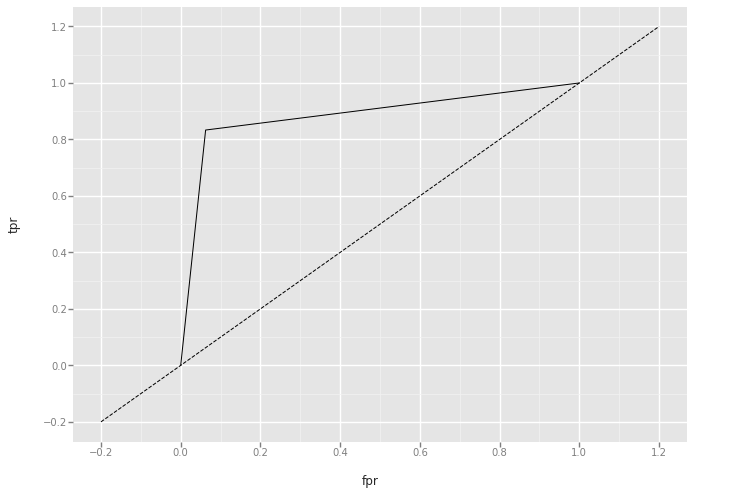

<ggplot: (8780022906930)>

In [790]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred3)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
roc_plot3 = ggplot(df, aes(x='fpr', y='tpr')) + geom_line() + geom_abline(linetype='dashed')
roc_plot3

# Summary

Now in the end we can compare all the different evaluations from each different method and see which did the best.
1 = Logistic Regression
2 = SVM
3 = Gaussian NB

In [791]:
print("1 accuracy score= ", ac_score1)
print("2 accuracy score= ", ac_score2)
print("3 accuracy score= ", ac_score3)

1 accuracy score=  0.95
2 accuracy score=  0.6
3 accuracy score=  0.875


In [792]:
print("1 auc= ", score1)
print("2 auc= ", score2)
print("3 auc= ", score3)

1 auc=  0.9479166666666667
2 auc=  0.5
3 auc=  0.8854166666666667


In [794]:
print("1 confusion matrix: " + '\n', confusion_matrix1)
print("2 confusion matrix: ERROR")
print("3 confusion matrix: ERROR")

1 confusion matrix: 
 [[15  1]
 [ 1 23]]
2 confusion matrix: ERROR
3 confusion matrix: ERROR


In [793]:
print("1 classification report: " + '\n', class_rep1)
print("2 classification report: " + '\n', class_rep2)
print("3 classification report: " + '\n', class_rep3)

1 classification report: 
              precision    recall  f1-score   support

          0       0.94      0.94      0.94        16
          1       0.96      0.96      0.96        24

avg / total       0.95      0.95      0.95        40

2 classification report: 
              precision    recall  f1-score   support

          0       0.00      0.00      0.00        16
          1       0.60      1.00      0.75        24

avg / total       0.36      0.60      0.45        40

3 classification report: 
              precision    recall  f1-score   support

          0       0.79      0.94      0.86        16
          1       0.95      0.83      0.89        24

avg / total       0.89      0.88      0.88        40



Overall, we can see now our best method for predicting the number of doors a car had given all of this other data was by using logistic regression.